In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn

In [303]:
titan=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [304]:
titan.shape

(891, 12)

In [305]:
titan.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [306]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

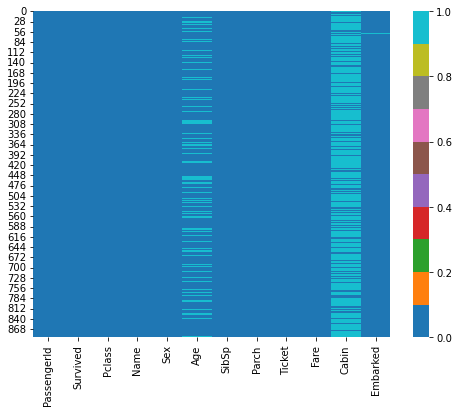

In [307]:
plt.figure(figsize=(8,6))
sns.heatmap(titan.isnull(),cmap='tab10')

### Observation-1 :

In the above dataset :

1) The size of table is 891*12 i.e. no. of rows are 891 and no. of columns are 12(including target).

2) Out of 12 columns 7 columns are continuous in nature and rest 5 are object type.

3) Null values are present in the Age, Embarked and Cabin columns, so there is need to adopt imputation technique.

4) In case of object data type, we will apply the encoding technique on those columns which are contributing to make prediction and those column which are not important for our model will be dropped.

5) The columns which are not playing a important role for prediction are as follows:

    A.PassengerId
    B.Name 
    c.Ticket

###### Droping the coloumns :

In [308]:
titan=titan.drop(["PassengerId"],axis=1)
titan=titan.drop(["Name"],axis=1)
titan=titan.drop(["Ticket"],axis=1)

###### Adopting imputation technique 

In [309]:
from sklearn.impute import SimpleImputer

In [310]:
imp=SimpleImputer(strategy='most_frequent')
titan['Age']=imp.fit_transform(titan['Age'].values.reshape(-1,1))
titan['Cabin']=imp.fit_transform(titan['Cabin'].values.reshape(-1,1))
titan['Embarked']=imp.fit_transform(titan['Embarked'].values.reshape(-1,1))

###### Adopting Encoding technique

In [311]:
from sklearn.preprocessing import LabelEncoder

In [312]:
le=LabelEncoder()

In [313]:
titan['Sex']=le.fit_transform(titan['Sex'])

In [314]:
titan['Cabin']=le.fit_transform(titan['Cabin'])
titan['Embarked']=le.fit_transform(titan['Embarked'])

In [315]:
titan

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,47,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,47,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,47,2
887,1,1,0,19.0,0,0,30.0000,30,2
888,0,3,0,24.0,1,2,23.4500,47,2
889,1,1,1,26.0,0,0,30.0000,60,0


### Some Import things--

Survived - 0 = NO
           1 = Yes

Pclass= -  1 = Upper
           2 = MIddle
           3 = Lower
        
Embarked - C(0) = Cherbourg Q(1) = Queenstown S(2) = Southampton     

Sex - 0 =  Female
      1 =  Male

# EDA
###### Exploratory Data Analysis (EDA): 
    EDA process will give us the batter understanding towards the pattern of Dataset

<AxesSubplot:xlabel='Sex', ylabel='count'>

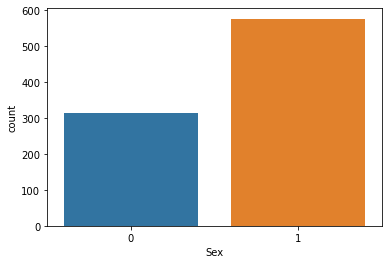

In [316]:
sns.countplot(titan['Sex']) # 0 = Female # 1 = Male

<AxesSubplot:xlabel='SibSp', ylabel='count'>

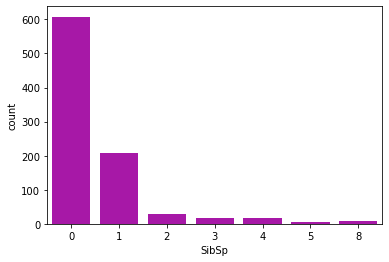

In [317]:
sns.countplot(titan['SibSp'],color='m')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

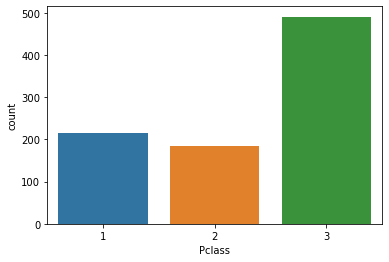

In [318]:
sns.countplot(titan['Pclass'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

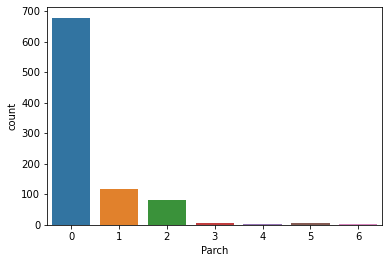

In [319]:
sns.countplot(titan['Parch'])

0= No Survived
1= Survived 


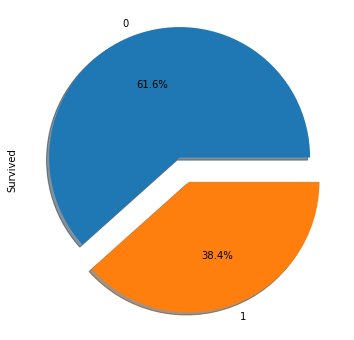

In [320]:
print("0= No Survived")
print("1= Survived ")
titan.Survived.value_counts().plot.pie(explode=[0.1,0.1],autopct="%1.1f%%",shadow=True,figsize=(6,6))
plt.show()

In [321]:
titan['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

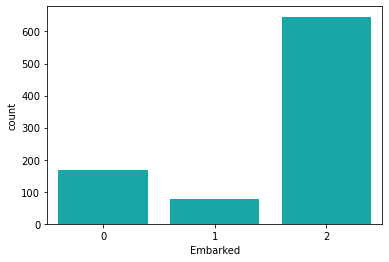

In [322]:
sns.countplot(titan['Embarked'],color='c')

### Observation-2

    1) Sex column shows that no. of male is Higher as compare to female.
      Female-314
      Male-577
    
    
    2) Embarked column are divided into 3 types of ports:
      A. Southampton(2)
      B. Cherbourg(0)
      C. Queenstown(1)
      
      
    Southampton(2) population is higher as compare to Cherbourg(0) and Queenstown(1)
    
    
    3) Survived column tell us that only two possibilities are present: either survived or not survived.
     No. of not survived(549) is greater as compare to survived(342). It means plenty of the people present on the ship was unable to survive.
     The survival rate is 61.6 % and unsurvived people's rate is 38.4 % .
     
     
    4) The Economic Pclass are divided in three types of class: Upper, Middle and Lower. The no. of lower class is higher as compare to upper and middle class. It means that the population of middle class family was more.
    
    
    5) Sibsp column shows the no. of sibling and spouses. 
    
        A) Majority of people had no sibling .which were 600 in number.
        B) 200 people had 1 sibling.
        c) Around 20 people had 2 sibling.
        D) similarly,15 people had 3 sibling.
        E) Very less no of people had 4,5 and 8 siblings.
        
    6) Parch column is showing the no. of parents and children. 
       
       A) Majority of the people had no children.
       B) Around 105 people had only 1 child.
       c) Around 95 people had 2 children.
       D) Few people had 3, 4 and 5 children
       
       
    

<AxesSubplot:xlabel='Survived', ylabel='count'>

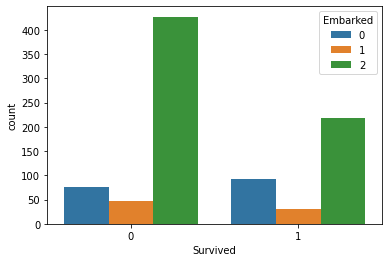

In [323]:
sns.countplot(titan["Survived"], hue=titan["Embarked"])

<AxesSubplot:xlabel='Survived', ylabel='count'>

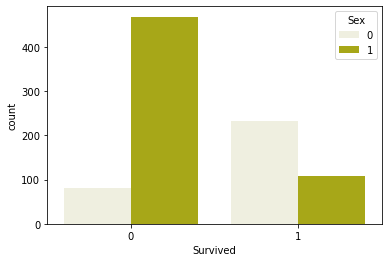

In [324]:
sns.countplot(titan['Survived'], hue=titan['Sex'],color='y')

<AxesSubplot:xlabel='Survived', ylabel='count'>

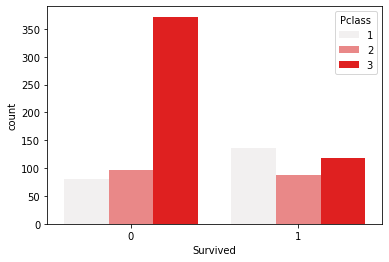

In [325]:
sns.countplot(titan['Survived'],hue=titan['Pclass'],color='r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

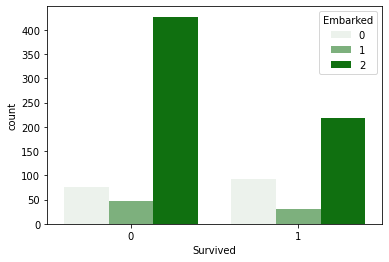

In [326]:
sns.countplot(titan['Survived'],hue=titan['Embarked'],color='g')

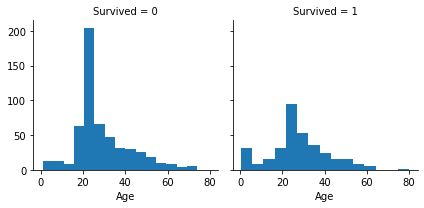

In [327]:
fig= sns.FacetGrid(titan, col='Survived')
fig.map(plt.hist, 'Age', bins=15)


### Observation-3

From the above observations:

###### 1. Survived vs Sex - 

If we look the survival vs sex ,the result is very interesting, The Female more survived as compare to male.
the survival population of female is something 235 and the survival rate of male is 107  .
         
   In the another side of coin , we have Un survived population . In this side the Male population (something 450) is very high means the male population was unable to survived as compare to female. The female population in Un survived side is less then 100.
   
###### 2. Survived vs Pclass -

If we see the survived vs pclass, Lower class(3) population is more in Un survived side which is around 370 in numbers and those population is very less which belongs to upper class(1) and middle class(2).

In the another side, Upper and lower class population is more survived as compare to middle class.

###### 3. Survived vs Embarked - C(0) = Cherbourg Q(1) = Queenstown S(2) = Southampton

According to this graph the people who were embarked from Queenstown survived more(around 200 people) as compare to Cherbourg  and Southampton people.

###### 4. Survived vs Age -

From the above graph, we can say that those people who belongs to Age group of 20-40 were more survived. And the interesting fact is this the children (Age<10) has high survival rate.

###### Checking Outliers 

In [328]:
titan.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,32.204208,53.639731,1.536476
std,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,49.693429,23.568293,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,47.000000,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,47.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,47.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,146.000000,2.000000


Survived       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Pclass      AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Sex          AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Age         AxesSubplot(0.606034,0.536818;0.133621x0.343182)
SibSp       AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Parch             AxesSubplot(0.125,0.125;0.133621x0.343182)
Fare           AxesSubplot(0.285345,0.125;0.133621x0.343182)
Cabin           AxesSubplot(0.44569,0.125;0.133621x0.343182)
Embarked       AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

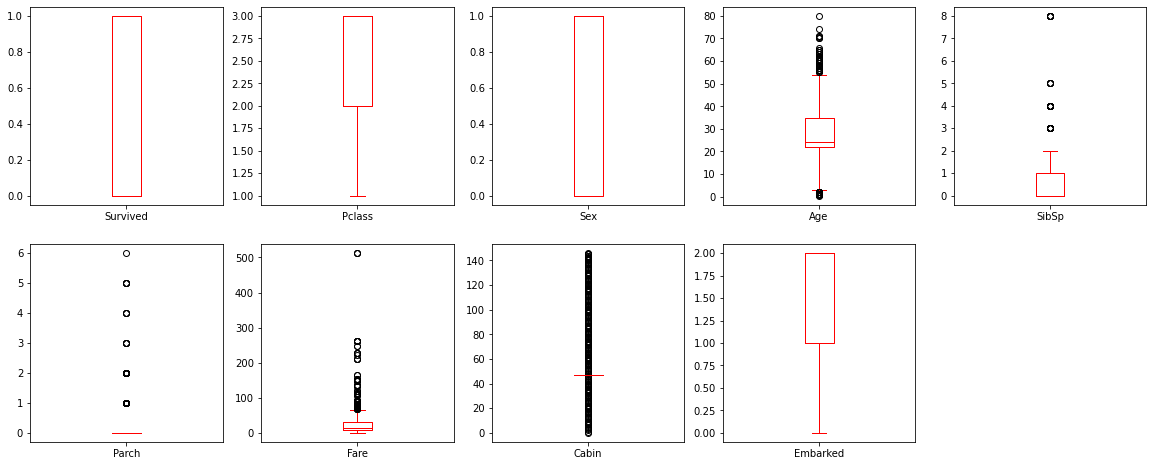

In [329]:
titan.plot(kind='box',subplots=True,layout=(2,5),figsize=[20,8],color='r')

<AxesSubplot:xlabel='Age', ylabel='Survived'>

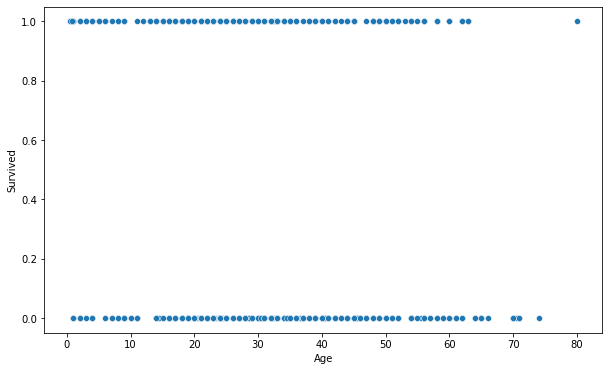

In [330]:
plt.figure(figsize=(10,6))
sns.scatterplot(titan['Age'], titan['Survived'],data=titan)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

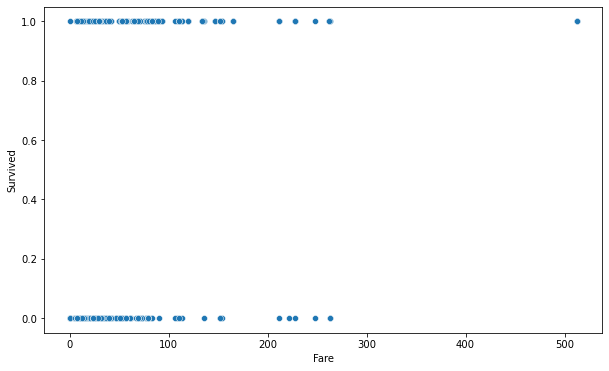

In [331]:
plt.figure(figsize=(10,6))
sns.scatterplot(titan['Fare'], titan['Survived'],data=titan)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

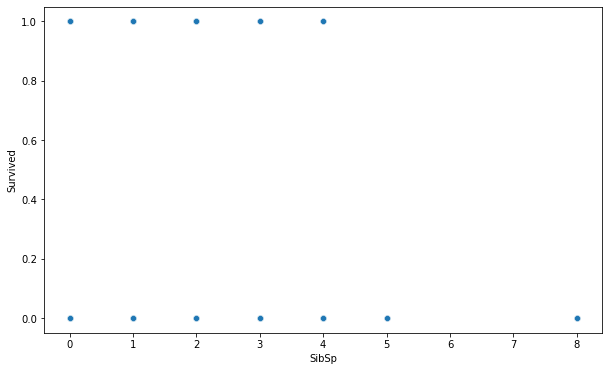

In [332]:
plt.figure(figsize=(10,6))
sns.scatterplot(titan['SibSp'],titan['Survived'],data=titan)

### Observation-4

In the above datasets some columns have outliers.

1) As we can see, cabin column has outliers. For example, the max values is 146 while its mean is 53 .The mean is sensitive to outliers but the fact that mean is so small compared to the max value indicates the outliers are present.

2) Similarly, the max Age is 80 while the mean age is 29,we can say outliers are present.

3) Same in the Sibsp 75th percentile value is 1 while max sibsp is 8, this condition shows the presence of outliers.

4) Similarly, the max fare is 512 while the mean fare is 32,we can say outliers are present.

5) Pclass, Embarked, sex and Survived columns do not have any outliers, because the gap between max and mean is negligible. 

.

###### Checking Skewness

In [333]:
titan.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Cabin       2.268926
Embarked   -1.264823
dtype: float64

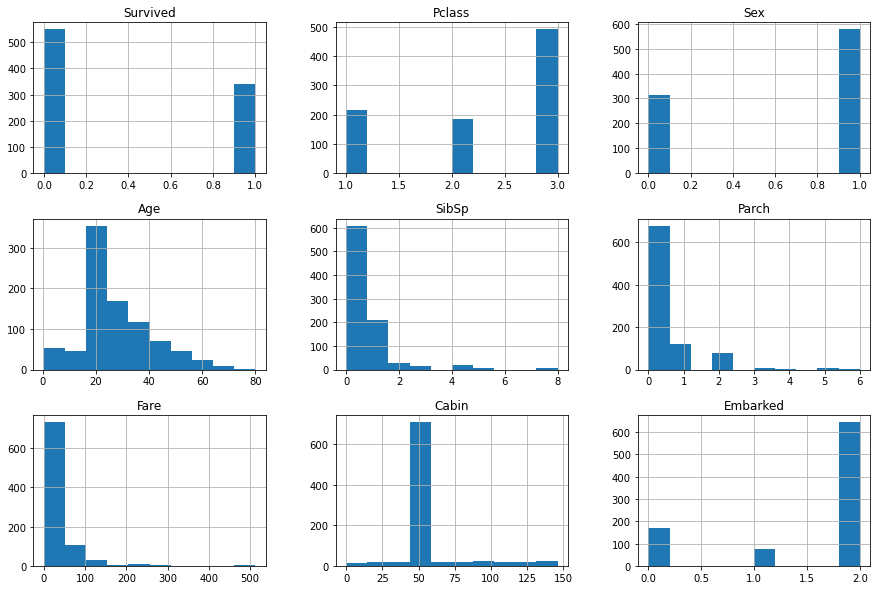

In [334]:
titan.hist(figsize=(15,10))
plt.show()

### Observation-5:

In the above dataset most of the columns has skewness :

* High skewness represents data imbalancy.

* Less skewness represents that our data are equally distributed.

1) Fare(4.78) and Sibsp(3.6) columns are highly skewed or we can say high skewness are present in these columns.

2) In Parch(2.7), Cabin(2.26) columns are showing high skewness.

3) Embarked column showing negative(-1.23) skewd data.

4) similarly, Pclass has also showing some negative skewness.

skewness by Describe method :

5) In parch column mean is 0.38 and median is 0, i.e. mean is greater then median showing skewness.

6) In fare column mean is 32.20 and median is 31, i.e. mean is greater then median showing some skewness.

6) Cabin column also has some skewness because mean is 53.63 and median is 47, i.e. mean is greater then median.

.


###### Checking Correlation :

In [335]:
Target_survived=titan.iloc[:,0]

In [336]:
titan["Target_survived"]=Target_survived

In [337]:
titan.drop(['Survived'],axis=1,inplace=True)

In [338]:
pp=titan.corr()['Target_survived'].sort_values()
pp

Sex               -0.543351
Pclass            -0.338481
Embarked          -0.167675
Age               -0.052872
SibSp             -0.035322
Parch              0.081629
Cabin              0.175690
Fare               0.257307
Target_survived    1.000000
Name: Target_survived, dtype: float64

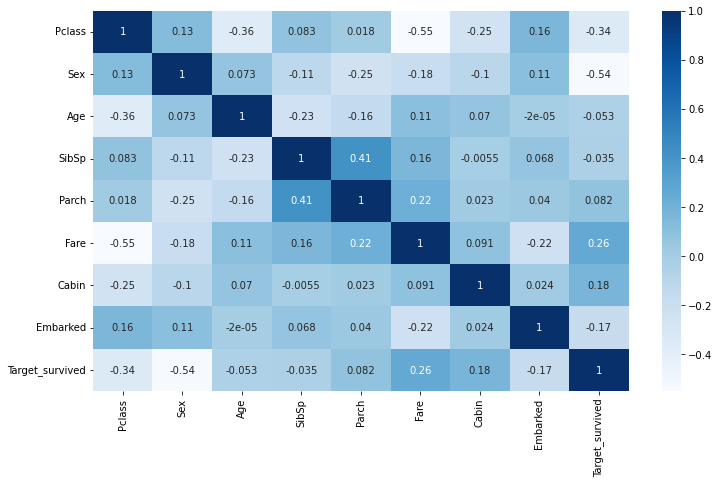

In [339]:
plt.figure(figsize=(12,7))
sns.heatmap(titan.corr(),annot=True,cmap="Blues")
plt.show()

<AxesSubplot:xlabel='SibSp', ylabel='Parch'>

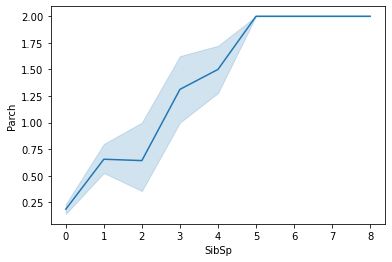

In [340]:
sns.lineplot(data=titan,x='SibSp',y='Parch')

<AxesSubplot:xlabel='Parch', ylabel='Cabin'>

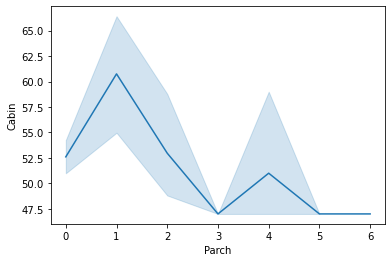

In [341]:
sns.lineplot(data=titan,x='Parch',y='Cabin')

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

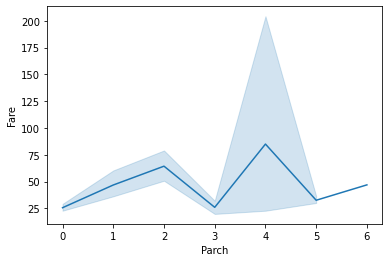

In [342]:
sns.lineplot(data=titan,x='Parch',y='Fare')

<AxesSubplot:xlabel='Target_survived', ylabel='Parch'>

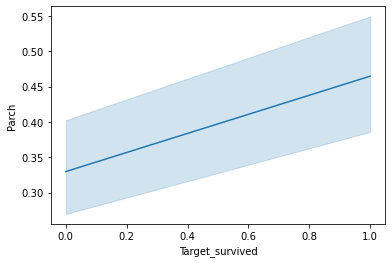

In [343]:
sns.lineplot(data=titan,x='Target_survived',y='Parch')

### Observation-6

From the above outcomes we can say that:

we are considering a good bond when the correlation is in the range of -0.5 to +0.5 .

There is no good correlation between the columns. we can not say that any of two columns is making a strong bond.
so there are no chances to adopt multicollinearity(VIF).

1. Sex and Embarked column has negative correlation with the target column which can be considered as a poor bond.


2. Parch columns has 8.2 percent correlation with the target column which can be considered as weak bond.


3. Fare has 26 percent correlation with the target column which can be considered as a good bond.


4. Pclass and  Sbsp column has negative correlation with the target column which can be considered as a poor bond.


5. Cabin column has 18 percent correlation with target column , which can be considered as a avg.bond.


6. SibSp and Parch column has normal correlation with each other ,if one increases second also increases.


7. Increase in no. of parents and children is increasing the cabin till the point 3rd . More then 3 parents and children used.

# Data preprocessing

In [344]:
x=titan.iloc[:,0:-1]
y=titan.iloc[:,-1]

In [345]:
x.shape

(891, 8)

In [346]:
y.shape

(891,)

In [347]:
xcl=x.columns
xcl

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

.

##### Removing Outliers

In [348]:
import scipy
from scipy.stats import zscore

In [349]:
z=np.abs(zscore(x))
z.shape

(891, 8)

In [350]:
threshold=3
print(np.where(z>3))

(array([  6,  10,  13,  16,  25,  27,  50,  59,  66,  68,  71,  75,  86,
        88,  96, 116, 118, 119, 128, 148, 159, 164, 167, 171, 180, 182,
       183, 193, 201, 205, 233, 251, 258, 261, 262, 266, 278, 299, 309,
       311, 324, 337, 339, 340, 341, 345, 360, 370, 377, 380, 386, 394,
       434, 437, 438, 438, 456, 462, 480, 493, 516, 527, 541, 542, 557,
       558, 567, 577, 585, 610, 618, 630, 638, 662, 672, 678, 679, 683,
       686, 689, 699, 700, 715, 716, 724, 730, 736, 737, 742, 745, 772,
       774, 776, 779, 787, 792, 809, 813, 824, 835, 846, 850, 851, 858,
       863, 885], dtype=int64), array([6, 6, 4, 3, 4, 5, 3, 3, 6, 3, 3, 6, 4, 5, 2, 2, 5, 3, 6, 6, 3, 3,
       4, 3, 3, 3, 6, 6, 3, 6, 3, 6, 5, 3, 6, 3, 3, 5, 6, 5, 3, 6, 6, 6,
       5, 6, 4, 6, 5, 5, 3, 6, 6, 4, 4, 5, 6, 6, 3, 2, 6, 5, 3, 3, 5, 6,
       4, 6, 6, 4, 6, 2, 4, 6, 2, 4, 5, 3, 3, 5, 6, 5, 6, 5, 6, 5, 4, 5,
       5, 2, 6, 4, 6, 5, 3, 3, 6, 3, 3, 6, 3, 3, 2, 4, 3, 4], dtype=int64))


In [351]:
x=x[(z<3).all(axis=1)]

In [352]:
y=y[(z<3).all(axis=1)]

In [353]:
print("size of x is",x.shape)
print("size of y is",y.shape)

size of x is (786, 8)
size of y is (786,)


.

##### Removing Skewness

We are using power transformation technique to remove skeness

In [354]:
from sklearn.preprocessing import power_transform

In [355]:
x=power_transform(x,method='yeo-johnson')

In [356]:
x

array([[ 0.85539573,  0.711159  , -0.49270048, ..., -0.81137417,
        -0.15241316,  0.6138499 ],
       [-1.49437355, -1.4061553 ,  0.79941695, ...,  1.57732674,
         1.71485526, -1.77563521],
       [ 0.85539573, -1.4061553 , -0.15175191, ..., -0.71962956,
        -0.15241316,  0.6138499 ],
       ...,
       [ 0.85539573, -1.4061553 , -0.32040217, ...,  0.42078696,
        -0.15241316,  0.6138499 ],
       [-1.49437355,  0.711159  , -0.15175191, ...,  0.68010369,
         0.61986458, -1.77563521],
       [ 0.85539573,  0.711159  ,  0.33545488, ..., -0.74269295,
        -0.15241316, -1.22675332]])

.

##### Adopting Scaling technique to scale the data

In [357]:
from sklearn.preprocessing import StandardScaler

In [358]:
sc=StandardScaler()

In [359]:
x=sc.fit_transform(x)

In [360]:
x=pd.DataFrame(x,columns=xcl)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.855396,0.711159,-0.492700,1.579823,-0.469563,-0.811374,-0.152413,0.613850
1,-1.494374,-1.406155,0.799417,1.579823,-0.469563,1.577327,1.714855,-1.775635
2,0.855396,-1.406155,-0.151752,-0.623204,-0.469563,-0.719630,-0.152413,0.613850
3,-1.494374,-1.406155,0.570022,1.579823,-0.469563,1.275043,0.333265,0.613850
4,0.855396,0.711159,0.570022,-0.623204,-0.469563,-0.703446,-0.152413,0.613850
...,...,...,...,...,...,...,...,...
781,-0.649149,0.711159,-0.068686,-0.623204,-0.469563,-0.202172,-0.152413,0.613850
782,-1.494374,-1.406155,-0.758904,-0.623204,-0.469563,0.680104,-1.337080,0.613850
783,0.855396,-1.406155,-0.320402,1.579823,2.148443,0.420787,-0.152413,0.613850
784,-1.494374,0.711159,-0.151752,-0.623204,-0.469563,0.680104,0.619865,-1.775635


.

##### Adopting SMOTE :

The purpose of smote is to make the imbalanced dataset to the balancing dataset by creating synthathic samples.

In [361]:
from imblearn.over_sampling import SMOTE

<AxesSubplot:xlabel='Target_survived', ylabel='count'>

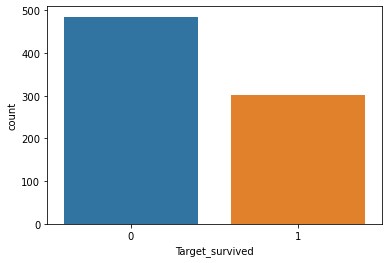

In [362]:
sns.countplot(y)

In [363]:
smt=SMOTE()

In [364]:
x_new,y_new=smt.fit_resample(x,y)

In [365]:
x_new.shape

(970, 8)

In [366]:
y_new.shape

(970,)

<AxesSubplot:xlabel='Target_survived', ylabel='count'>

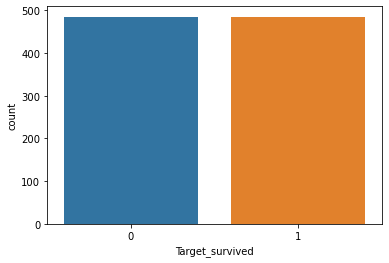

In [367]:
sns.countplot(y_new)

######  Importing Important lib.

In [368]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

###### Best random state

In [369]:
maxauc=0
maxrs=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy',acc,'random_state ',i)

    if acc>maxauc:
        maxauc=acc
        maxrs=i

accuracy 0.8 random_state  0
accuracy 0.8 random_state  1
accuracy 0.9 random_state  2
accuracy 0.7 random_state  3
accuracy 0.9 random_state  4
accuracy 0.6 random_state  5
accuracy 0.7 random_state  6
accuracy 0.75 random_state  7
accuracy 0.8 random_state  8
accuracy 0.9 random_state  9
accuracy 0.75 random_state  10
accuracy 0.7 random_state  11
accuracy 0.95 random_state  12
accuracy 0.9 random_state  13
accuracy 0.7 random_state  14
accuracy 0.9 random_state  15
accuracy 0.75 random_state  16
accuracy 0.8 random_state  17
accuracy 0.65 random_state  18
accuracy 0.8 random_state  19
accuracy 0.6 random_state  20
accuracy 0.8 random_state  21
accuracy 0.7 random_state  22
accuracy 0.8 random_state  23
accuracy 0.8 random_state  24
accuracy 0.8 random_state  25
accuracy 0.7 random_state  26
accuracy 0.95 random_state  27
accuracy 0.95 random_state  28
accuracy 0.85 random_state  29
accuracy 0.75 random_state  30
accuracy 0.8 random_state  31
accuracy 0.8 random_state  32
accuracy 0.

In [370]:
print("Best accuracy is",maxauc,"on random state",maxrs) 

Best accuracy is 0.95 on random state 12


###### Spliting the data set into training and testing

In [371]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,test_size=20)

In [372]:
x_new.shape

(970, 8)

In [373]:
print("shape of input variable before spliting is",x_new.shape)
print("shape of input variable after spliting is",x_train.shape)
print("shape of target variable before spliting is ",y_new.shape)
print("shape of target variable after spliting is ",y_train.shape)

shape of input variable before spliting is (970, 8)
shape of input variable after spliting is (766, 8)
shape of target variable before spliting is  (970,)
shape of target variable after spliting is  (766,)


### Logistic Regression

In [374]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print("Accuracy -", accuracy*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy - 90.0
[[13  1]
 [ 1  5]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.83      0.83      0.83         6

    accuracy                           0.90        20
   macro avg       0.88      0.88      0.88        20
weighted avg       0.90      0.90      0.90        20



##### Now we will use Diffrent Algorithium suh as :
    1.K nearest neighbour 
    2.Naive bayes 
    3.Design tree
    4.Support vector machine(svm) 

In [375]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

###### KNeighborsClassifier

In [376]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print("Accuracy- ",(accuracy_score(y_test,pred))*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy-  85.0
[[13  1]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.80      0.67      0.73         6

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20



###### DecisionTreeClassifier

In [377]:
lit=['gini','entropy']

for i in lit:  
    print("From ",i)
    dct=DecisionTreeClassifier(criterion=i)
    dct.fit(x_train,y_train)
    pred=dct.predict(x_test)
    print("Accuracy -",(accuracy_score(y_test,pred)*100))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

From  gini
Accuracy - 90.0
[[14  0]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.67      0.80         6

    accuracy                           0.90        20
   macro avg       0.94      0.83      0.87        20
weighted avg       0.91      0.90      0.89        20

From  entropy
Accuracy - 80.0
[[12  2]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.67      0.67      0.67         6

    accuracy                           0.80        20
   macro avg       0.76      0.76      0.76        20
weighted avg       0.80      0.80      0.80        20



###### Support vector machine classifier

In [378]:
lip=['rbf','poly']

for i in lip:
    print("From",i)
    svm=SVC(kernel=i)
    svm.fit(x_train,y_train)
    pred=svm.predict(x_test)
    print("Accuracy -",(accuracy_score(y_test,pred)*100))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

From rbf
Accuracy - 90.0
[[13  1]
 [ 1  5]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.83      0.83      0.83         6

    accuracy                           0.90        20
   macro avg       0.88      0.88      0.88        20
weighted avg       0.90      0.90      0.90        20

From poly
Accuracy - 95.0
[[14  0]
 [ 1  5]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



###### Naive_bayes--GaussianNB

In [379]:
gus=GaussianNB()
gus.fit(x_train,y_train)
pred=gus.predict(x_test)
print("Accuracy- ",(accuracy_score(y_test,pred))*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy-  85.0
[[12  2]
 [ 1  5]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.71      0.83      0.77         6

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



### Cross-validation

 KNeighborsClassifie ,DecisionTreeClassifie(entropy) and Support vector machine(rbf) all the three classifiers are giving high accuracy.

 We are adopting cross-validation technique to see that our model is overfitted or not.
 
 This model is able to see the 360 degree view of the entire dataset.
 

In [380]:
from sklearn.model_selection import cross_val_score

In [381]:
src=cross_val_score(knn , x , y , cv=7)
print("Cross validation of KNeighbors Classifier model is",src.mean())

Cross validation of KNeighbors Classifier model is 0.8207061585696225


In [382]:
src=cross_val_score(svm , x , y , cv=7)
print("Cross validation of SVC  model is",src.mean())

Cross validation of SVC  model is 0.8066529709228824


In [383]:
src=cross_val_score(dct , x , y , cv=7)
print("Cross validation of Decision tree Classifier model is",src.mean())

Cross validation of Decision tree Classifier model is 0.7723270724218892


In [384]:
src=cross_val_score(gus , x , y , cv=7)
print("Cross validation of Naive bayes classifier (GaussianNB) Classifier model is",src.mean())

Cross validation of Naive bayes classifier (GaussianNB) Classifier model is 0.7774968394437421


## Bagging and Boosting

###### Bagging

###### RandomForestClassifier

In [385]:
from sklearn.ensemble import RandomForestClassifier

In [386]:
rfc=RandomForestClassifier(n_estimators=100,random_state=43)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print("accuracy ",(accuracy_score(y_test,pred)*100))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


accuracy  85.0
[[13  1]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.80      0.67      0.73         6

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20



###### Boosting

###### Boosting from AdaBoostClassifier

In [387]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
svm=SVC()

ad=AdaBoostClassifier(n_estimators=150,base_estimator=svm,algorithm='SAMME')
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print("accuracy ",(accuracy_score(y_test,pred)*100))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy  70.0
[[14  0]
 [ 6  0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20



###### Boosting From GradientBoostingClassifier

In [390]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=150)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print("accuracy ",(accuracy_score(y_test,pred)*100))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy  90.0
[[14  0]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.67      0.80         6

    accuracy                           0.90        20
   macro avg       0.94      0.83      0.87        20
weighted avg       0.91      0.90      0.89        20



In [391]:
src=cross_val_score(rfc , x , y , cv=7)
print("Cross validation of Random forest Classifier model is",src.mean())

Cross validation of Random forest Classifier model is 0.8079623442297272


In [392]:
src=cross_val_score(gbc , x , y , cv=7)
print("Cross validation of Gradient boosting classifier model is",src.mean())

Cross validation of Gradient boosting classifier model is 0.8257630485822647


In [393]:
src=cross_val_score(ad , x , y , cv=7)
print("Cross validation of Adaboost Classifier model is",src.mean())

Cross validation of Adaboost Classifier model is 0.6170421708506412


## Hyper Parameter tuning

In [394]:
from sklearn.model_selection import GridSearchCV

In [395]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}

In [396]:
GBC=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)
GBC.fit(x_train,y_train)
GBC.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

In [397]:
GBC.best_estimator_

GradientBoostingClassifier(n_estimators=250)

In [399]:
GBC_pred=GBC.best_estimator_.predict(x_test)
accuracy_score(y_test,GBC_pred)

0.9

In [244]:
#import joblib
#joblib.dump(gsc.best_estimator_,'Titanic.pkl')

#### As we see In the hyper parameter tuning the Gradient boosting classifier is giving highest accuracy i.e. 90%, so we will go with Gradient boosting classifier.

## AUC-ROC Curve

###### AUC-ROC curve is the graphical representation of confusion matrix.

In [401]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [404]:
y_pred_prob=GBC.best_estimator_.predict_proba(x_test)[:,-1]

In [405]:
y_pred_prob

array([0.08963998, 0.12124593, 0.09743734, 0.11328075, 0.04321886,
       0.9527804 , 0.99184686, 0.18013929, 0.99344505, 0.14439294,
       0.05070705, 0.84495325, 0.05397545, 0.09256907, 0.03335073,
       0.02105559, 0.11208586, 0.44588516, 0.0305833 , 0.10058333])

In [406]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

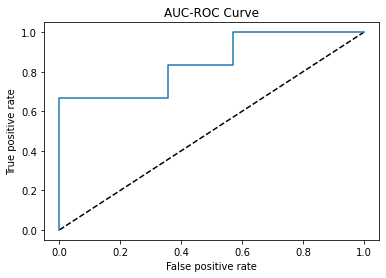

In [407]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("AUC-ROC Curve")
plt.show()

In [409]:
auc_score=roc_auc_score(y_test,GBC.best_estimator_.predict(x_test))

In [410]:
print((auc_score))

0.8333333333333333


###### AUC-ROC curve score is 83.33 %

###### Saving the model

In [789]:
import joblib

In [411]:
joblib.dump(GBC.best_estimator_,"titanic_final90%.obj")

['titanic_final90%.obj']

In [791]:
# for loading the model -

    # loaded_model=joblib.load("titanicfile.obj")

# Conclusion :

From the above observations we are concluding that
    
   1. we had many null values in data set, to fill the NaN values we adopted simple imputer.
   
    
   2. In order to replace the object data to the int values we used encoading technique.
   

   3. Some columns we dropped, because they was not more contributing to make prediction.
   
    
   4. In our data set Some skewness and outliers was present, To remove this we used zscore method for outliers removing and power transformation method for skewness removing.
   

   5. For scaling the data set we used standard scaller technique.
   
    
   6. Our data set was imbalanced, for balancing it SMOTE has been used.
   

   7. We used many classifier for predicting -
    
    like- 
          k nearest neighbour classifier
          Naive bayes classifier(GaussianNB)
          Design tree classifier
          Support vector machine classifier 
          
   8. In order to control overfitting and underfitting we adopted Cross validation.
   
   
   9. For Bagging and boosting we have used Random forest classifier,Adaboost classifier and Gradient boosting classifier.
   
    
   10. We have plotted AUC-ROC curve to plot confusion matrix and the Score of AUC-ROC curve is 83.33 %.
   
   11. we worked on Hyper parameter tuning on Gradient boosting classifier for boosting our model accuracy. 
   
   
   
#### Finally we got Our best model Which is Gradient Boosting classifier, it gave the 90% accuracy. Which can be considered as good accuracy.
   ##### Now our model is ready to predict.
